### Importing all the libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

### To print all outputs

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Reading data set and understanding

In [5]:
loan=pd.read_csv("loan.csv",low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
loan.shape

(39717, 111)

In [7]:
pd.set_option('display.max_columns', 200)
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Data Cleaning

First objective is to extract the data which is required for our analysis. To get that data below steps are followed

1. To find the unique level of the data and removing duplicates 
2. removing columns with high missing percentage
3. filtering rows and columns which are not required for the analysis
4. converting required variable to the correct type

##### STEP1: removing duplicates if present

In [9]:
loan.id.duplicated().sum()
loan.member_id.duplicated().sum()

0

0

In [10]:
loan["id"].nunique()
loan["member_id"].nunique()

39717

39717

Note: in the data, there is no duplicate present in loan application ID or the customer ID. hence no deduplication required

##### STEP2: removing columns with high missing percentage

In [11]:
#counting column wise the total missing records
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [12]:
#counting the column wise percentage of the total missing records
z=round(loan.isna().sum()/len(loan.index), 2)*100
z

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

Note: it is observed that many columns have 100% missing values. Hence dropping them in the next step.

In [13]:
loan_1=loan.drop(loan.columns[100*(loan.isna().sum()/len(loan.index)) >= 100],axis=1)

In [14]:
loan_1.shape

(39717, 57)

In [15]:
loan_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [16]:
z1=round(loan_1.isna().sum()/len(loan.index), 2)*100
z1

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [17]:
pd.set_option('display.max_colwidth', None)
loan_1[['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc']].head(10)

,next_pymnt_d,mths_since_last_record,mths_since_last_delinq,desc
0,NaN,NaN,NaN,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>
1,NaN,NaN,NaN,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>
2,NaN,NaN,NaN,NaN
3,NaN,NaN,35.0,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>"
4,Jun-16,NaN,38.0,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills. I've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. My job is very stable, I love it.<br>"
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,"Borrower added on 12/18/11 > I am planning on using the funds to pay off two retail credit cards with 24.99% interest rates, as well as a major bank credit card with a 18.99% rate. I pay all my bills on time, looking for a lower combined payment and lower monthly payment.<br>"
7,NaN,NaN,NaN,Borrower added on 12/16/11 > Downpayment for a car.<br>
8,NaN,NaN,NaN,Borrower added on 12/21/11 > I own a small home-based judgment collection business. I have 5 years experience collecting debts. I am now going from a home office to a small office. I also plan to buy a small debt portfolio (eg. $10K for $1M of debt) <br>My score is not A+ because I own my home and have no mortgage.<br>
9,NaN,NaN,NaN,"Borrower added on 12/16/11 > I'm trying to build up my credit history. I live with my brother and have no car payment or credit cards. I am in community college and work full time. Im going to use the money to make some repairs around the house and get some maintenance done on my car.<br><br> Borrower added on 12/20/11 > $1000 down only $4375 to go. Thanks to everyone that invested so far, looking forward to surprising my brother with the fixes around the house.<br>"


Note: after removing all the columns with 100% missing value, 4 variables are left among which 3 variable have more than 60% missing value. Hence dropping them. Because imputing them will bias my data.
    the variable desc has no use in our analysis and it also has 33 percent missing. Hence dropping all 4 of these variables.

In [18]:
loan_2=loan_1.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'],axis=1)
loan_2.shape

(39717, 53)

In [19]:
m=loan_2.dtypes
m

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

##### STEP3: filtering rows and columns which are not required for the analysis

In [20]:
loan_2["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Our objective is to analyse that if a loan applicant is likely to repay the loan or default at the time of application. Our target variable is loan_status which explains the current status of the loan.
Now target variable takes 3 values i.e charged off which means defaulted, Fully paid which means not defaulted and completed the payment and Current i.e the loan is ongoing.
A customer can not be judged basis his behaviour as status Current and will default or not default in future is ambiguous. Hence will drop the current category from analysis.

In [21]:
loan_3=loan_2[loan_2["loan_status"]!= "Current"]
loan_3.shape

(38577, 53)

Now at the time of application, the variable explaning the past loan behaviour will not be available and because of this reason, dropping all the behavorial variables.Along with that variables like zip_code and url are no use in analyzing probability of default. Hence dropping them as well.

In [22]:
bad_variable=["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util",
                   "total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int",
                   "total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt",
                   "last_credit_pull_d","title","zip_code","addr_state","url","verification_status","issue_d"]
bad_variable

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'title',
 'zip_code',
 'addr_state',
 'url',
 'verification_status',
 'issue_d']

In [23]:
loan_4=loan_3.drop(bad_variable,axis=1)
loan_4.shape

(38577, 27)

##### STEP4: converting columns to its correct data type

In [24]:
loan_4.loc[:, loan_4.dtypes==np.object]

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,loan_status,pymnt_plan,purpose,initial_list_status,application_type
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Fully Paid,n,credit_card,f,INDIVIDUAL
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Charged Off,n,car,f,INDIVIDUAL
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Fully Paid,n,small_business,f,INDIVIDUAL
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Fully Paid,n,other,f,INDIVIDUAL
5,36 months,7.90%,A,A4,Veolia Transportaton,3 years,RENT,Fully Paid,n,wedding,f,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...
39712,36 months,8.07%,A,A4,FiSite Research,4 years,MORTGAGE,Fully Paid,n,home_improvement,f,INDIVIDUAL
39713,36 months,10.28%,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,Fully Paid,n,credit_card,f,INDIVIDUAL
39714,36 months,8.07%,A,A4,NaN,< 1 year,MORTGAGE,Fully Paid,n,debt_consolidation,f,INDIVIDUAL
39715,36 months,7.43%,A,A2,NaN,< 1 year,MORTGAGE,Fully Paid,n,other,f,INDIVIDUAL


In [25]:
loan_4['int_rate']=loan_4["int_rate"].str[:-1]

In [26]:
loan_4['int_rate'].head(20)

0     10.65
1     15.27
2     15.96
3     13.49
5      7.90
6     15.96
7     18.64
8     21.28
9     12.69
10    14.65
11    12.69
12    13.49
13     9.91
14    10.65
15    16.29
16    15.27
17     6.03
18    11.71
19     6.03
20    15.27
Name: int_rate, dtype: object

In [27]:
loan_4["int_rate"] = loan_4["int_rate"].apply(pd.to_numeric)

In [28]:
loan_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  float64
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [29]:
loan_5 = loan_4[~loan_4['emp_length'].isnull()]

loan_5['emp_length'] = loan_5['emp_length'].apply(lambda x: re.findall('-?\d+\.?\d*', str(x))[0])

loan_5['emp_length'] = loan_5['emp_length'].apply(lambda x: pd.to_numeric(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [30]:
loan_5['emp_length'].head()

0    10
1     1
2    10
3    10
5     3
Name: emp_length, dtype: int64

In [31]:
loan_5['emp_length'].value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

### Data Analysis

two types of exploratory data analysis can be done, 
1. Univariate Data Analysis
2. Bivariate Data Analysis

##### Step1 : Univariate data analysis

For univariate analysis, mapping target variable to 0 and 1

In [32]:
def target_mapping(x):
    if x == "Fully Paid":
        return 0
    else:
        return 1
    
loan_5['loan_status_new'] = loan_5['loan_status'].apply(lambda x: target_mapping(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [33]:
loan_5[['loan_status_new','loan_status']].head()

,loan_status_new,loan_status
0,0,Fully Paid
1,1,Charged Off
2,0,Fully Paid
3,0,Fully Paid
5,0,Fully Paid


In [34]:
loan_5['loan_status_new'].describe()

count    37544.000000
mean         0.143805
std          0.350896
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status_new, dtype: float64

In [35]:
default_rate=round((loan_5['loan_status_new'].sum()/37544)*100,2)
default_rate

14.38

Note: total 14.38% has not payed the loan and hence defaulted.

In [36]:
cmap = plt.get_cmap("tab20c")

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7fdf902d1710>,
 [Text(-0.48020564069071314, 0.9896476861231082, 'default'),
  Text(0.48020577967696393, -0.9896476186829529, 'regular')],
 [Text(-0.2619303494676617, 0.5398078287944226, '14.38'),
  Text(0.2619304252783439, -0.5398077920088833, '85.62')])

<Figure size 720x720 with 0 Axes>

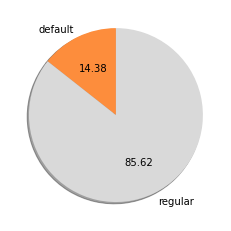

In [37]:
inner_colors = cmap(np.array([5, 20]))
plt.figure(figsize = (10,10))
plt.figure()
values = [14.38, 85.62] 
labels = ['default', 'regular'] 
plt.pie(values, labels=labels, autopct='%.2f',
        shadow = True,colors = inner_colors,startangle = 90)
plt.show()

In [38]:
loan_5.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,pymnt_plan,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status_new
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Fully Paid,n,credit_card,27.65,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Charged Off,n,car,1.00,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Fully Paid,n,small_business,8.72,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Fully Paid,n,other,20.00,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Fully Paid,n,wedding,11.20,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0


term
 36 months    0.108636
 60 months    0.251269
Name: loan_status_new, dtype: float64

<Figure size 144x288 with 0 Axes>

<AxesSubplot:xlabel='term', ylabel='loan_status_new'>

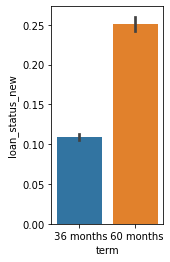

In [39]:
loan_5.groupby("term")['loan_status_new'].mean()
plt.figure(figsize = (2,4))
sns.barplot(x='term', y='loan_status_new', data=loan_5)
plt.show()

after plotting default rate across different loan term, it is observed that loan for longer terms are more risky than shorter loan terms

grade
A    0.057764
B    0.119289
C    0.167949
D    0.217915
E    0.267176
F    0.326382
G    0.335570
Name: loan_status_new, dtype: float64

<Figure size 648x288 with 0 Axes>

<AxesSubplot:xlabel='grade', ylabel='loan_status_new'>

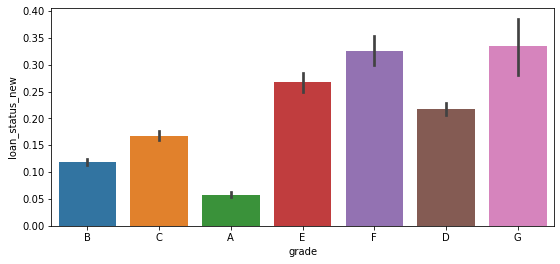

In [40]:
loan_5.groupby("grade")['loan_status_new'].mean()
plt.figure(figsize=(9, 4))
sns.barplot(x="grade",y="loan_status_new", data=loan_5)
plt.show()

sub_grade
A1    0.022814
A2    0.047189
A3    0.051694
A4    0.060172
A5    0.078967
B1    0.089431
B2    0.108539
B3    0.118718
B4    0.133166
B5    0.135209
C1    0.158888
C2    0.161664
C3    0.177641
C4    0.172619
C5    0.177362
D1    0.177948
D2    0.207968
D3    0.228440
D4    0.229834
D5    0.250923
E1    0.271449
E2    0.267769
E3    0.228175
E4    0.295943
E5    0.278215
F1    0.295681
F2    0.298246
F3    0.290698
F4    0.358108
F5    0.481818
G1    0.322581
G2    0.363636
G3    0.422222
G4    0.240741
G5    0.344828
Name: loan_status_new, dtype: float64

<Figure size 864x360 with 0 Axes>

<AxesSubplot:xlabel='sub_grade', ylabel='loan_status_new'>

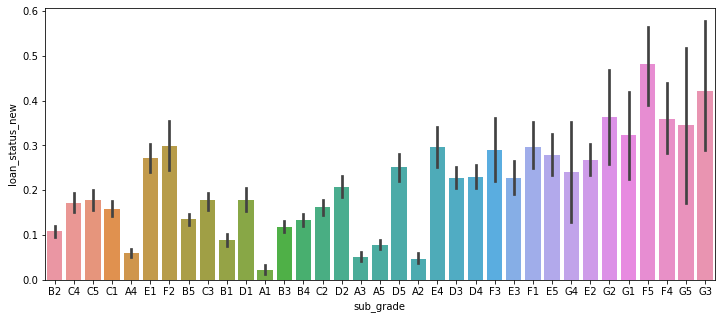

In [41]:
loan_5.groupby("sub_grade")['loan_status_new'].mean()
plt.figure(figsize=(12, 5))
sns.barplot(x="sub_grade",y="loan_status_new", data=loan_5)
plt.show()

From , above two plot , it is observed that the higher the loan grade, the higher is the default rate. But with sub grade, their is break in the trend but over all it follows the trend.

In [42]:
loan_5.emp_title.value_counts()

US Army                          131
Bank of America                  107
IBM                               65
AT&T                              57
Kaiser Permanente                 56
                                ... 
Sonlife Prosthetics                1
Bakersfield Memorial Hospital      1
hawker Beechcraft corporation      1
John Moriarty & Associates         1
FORT DUNCAN MEDICAL CENTER         1
Name: emp_title, Length: 27982, dtype: int64

In [43]:
loan_5.emp_length.value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

emp_length
1     0.142634
2     0.132137
3     0.138335
4     0.138241
5     0.143394
6     0.141605
7     0.153711
8     0.141463
9     0.128874
10    0.156810
Name: loan_status_new, dtype: float64

<Figure size 864x360 with 0 Axes>

<AxesSubplot:xlabel='emp_length', ylabel='loan_status_new'>

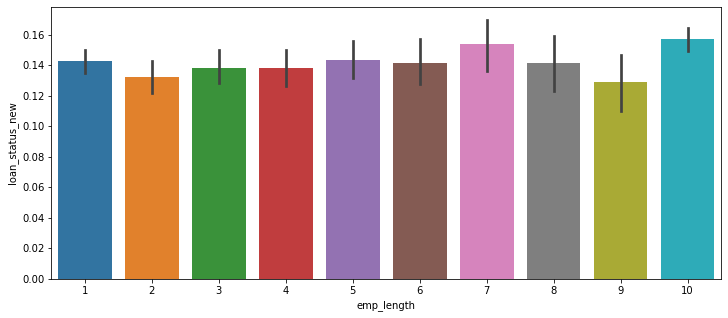

In [44]:
loan_5.groupby("emp_length")['loan_status_new'].mean()
plt.figure(figsize=(12, 5))
sns.barplot(x="emp_length",y="loan_status_new", data=loan_5)
plt.show()

employment length does not have direct impact on default trend as it shows a flat trend

home_ownership
MORTGAGE    0.135282
NONE        0.000000
OTHER       0.183673
OWN         0.144404
RENT        0.151344
Name: loan_status_new, dtype: float64

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='home_ownership', ylabel='loan_status_new'>

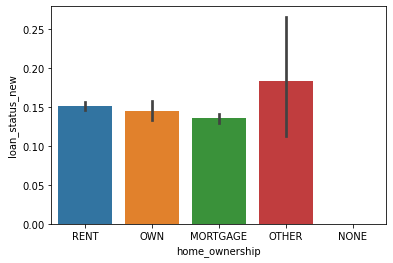

In [45]:
loan_5.groupby("home_ownership")['loan_status_new'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x="home_ownership",y="loan_status_new", data=loan_5)
plt.show()


home owner type other have the most risky profile and is highly expected to default than others

In [46]:
loan_5.purpose.value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

purpose
car                   0.107044
credit_card           0.104103
debt_consolidation    0.151570
educational           0.164038
home_improvement      0.118492
house                 0.166667
major_purchase        0.101442
medical               0.153963
moving                0.152174
other                 0.160517
renewable_energy      0.191489
small_business        0.270175
vacation              0.143678
wedding               0.100767
Name: loan_status_new, dtype: float64

<Figure size 2160x360 with 0 Axes>

<AxesSubplot:xlabel='purpose', ylabel='loan_status_new'>

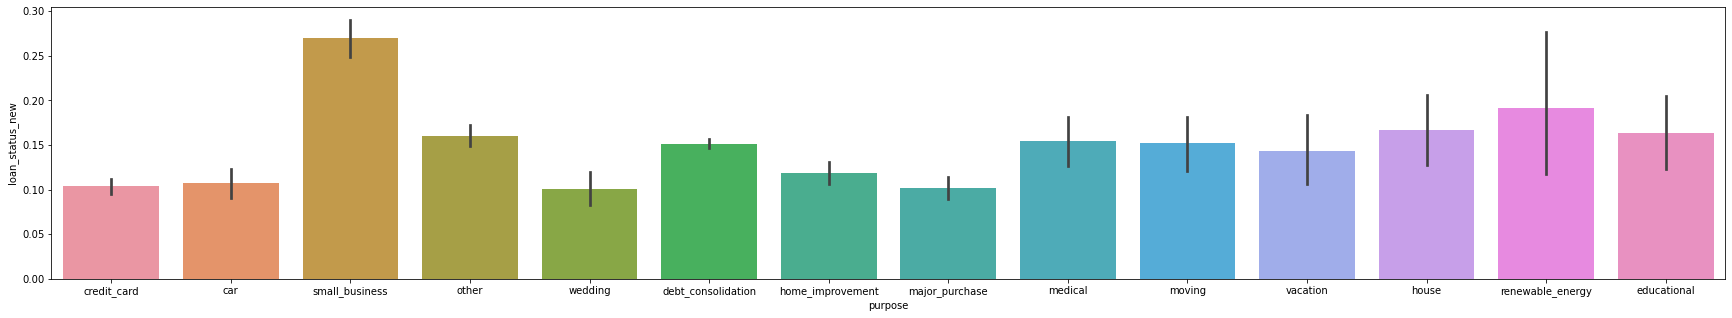

In [47]:
loan_5.groupby("purpose")['loan_status_new'].mean()
plt.figure(figsize=(30, 5))
sns.barplot(x="purpose",y="loan_status_new", data=loan_5)
plt.show()

small_buisness loans are extremely risky and have very high default rate and wedding loans are lowest risky profile

##### Univariate analysis for numeric variables

In [48]:
loan_5[["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment","annual_inc","dti"]].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti
count,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,3.754400e+04,37544.000000
mean,11119.329986,10853.560489,10280.495739,11.963319,324.650164,6.940708e+04,13.284186
std,7354.098954,7096.316776,7034.124211,3.683012,208.901055,6.467698e+04,6.660551
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000
25%,5500.000000,5400.000000,5000.000000,8.940000,167.370000,4.100000e+04,8.160000
50%,10000.000000,9600.000000,8850.000000,11.830000,280.000000,6.000000e+04,13.380000
75%,15000.000000,15000.000000,14075.000000,14.420000,428.942500,8.300000e+04,18.550000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000


In [49]:
# binning interest rate
def int_rate(n):
    if n <= 10:
        return 'low_interest_rate'
    elif n > 10 and n <=15:
        return 'medium_interest_rate'
    else:
        return 'high_interest_rate'
    
    
loan_5['interest_rate'] = loan_5['int_rate'].apply(lambda x: int_rate(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='interest_rate', ylabel='loan_status_new'>

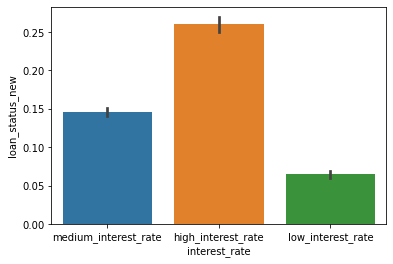

In [50]:
plt.figure(figsize=(6, 4))
sns.barplot(x="interest_rate",y="loan_status_new", data=loan_5)
plt.show()

With higher interest, the default rate increases. Similarly, low interest bucket has lower default rate

In [51]:
##### computing buckets for numeric variables
min_value = loan_5['loan_amnt'].min()
max_value = loan_5['loan_amnt'].max()
bins = np.linspace(min_value,max_value,11)
bins

array([  500.,  3950.,  7400., 10850., 14300., 17750., 21200., 24650.,
       28100., 31550., 35000.])

In [52]:
labels = ['bin1', 'bin2', 'bin3','bin4','bin5','bin6', 'bin7', 'bin8','bin9','bin10']
loan_5['bins_loan_amnt'] = pd.cut(loan_5['loan_amnt'], bins=bins, labels=labels, include_lowest=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
loan_5['bins_loan_amnt'].value_counts()

bin2     9474
bin3     7783
bin4     4842
bin1     4730
bin5     3900
bin6     2951
bin8     1611
bin7     1135
bin10     691
bin9      427
Name: bins_loan_amnt, dtype: int64

<Figure size 576x360 with 0 Axes>

<AxesSubplot:xlabel='bins_loan_amnt', ylabel='loan_status_new'>

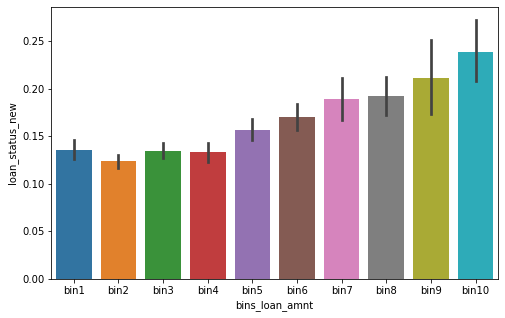

In [54]:
plt.figure(figsize=(8, 5))
sns.barplot(x="bins_loan_amnt",y="loan_status_new", data=loan_5)
plt.show()

In [55]:
def annual_inc_func(n):
    if n < 50000:
        return 'low_income'
    elif n >=50000 and n < 80000:
        return 'medium_income'
    elif n >= 80000 and n < 100000:
        return 'high_income'
    else:
        return 'very high_income'
        
loan_5['annual_income'] = loan_5['annual_inc'].apply(lambda x: annual_inc_func(x))


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [56]:
loan_5['annual_income'].value_counts()

low_income          13669
medium_income       13349
very high_income     5928
high_income          4598
Name: annual_income, dtype: int64

<Figure size 504x216 with 0 Axes>

<AxesSubplot:xlabel='annual_income', ylabel='loan_status_new'>

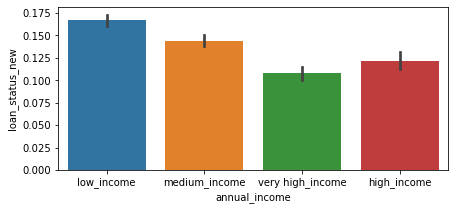

In [57]:
plt.figure(figsize=(7, 3))
sns.barplot(x="annual_income",y="loan_status_new", data=loan_5)
plt.show()

Higher the income higher is the default rate and inverse trend is very clear between two variables

In [58]:
##### computing buckets for numeric variables
min_value = loan_5['dti'].min()
max_value = loan_5['dti'].max()
bins = np.linspace(min_value,max_value,6)
bins
labels = ['bin1', 'bin2', 'bin3','bin4','bin5']
loan_5['bins_dti'] = pd.cut(loan_5['dti'], bins=bins, labels=labels, include_lowest=True)

array([ 0.   ,  5.998, 11.996, 17.994, 23.992, 29.99 ])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [59]:
loan_5['bins_dti'].value_counts()

bin3    11096
bin2     9964
bin4     8677
bin1     6164
bin5     1643
Name: bins_dti, dtype: int64

<Figure size 432x360 with 0 Axes>

<AxesSubplot:xlabel='bins_dti', ylabel='loan_status_new'>

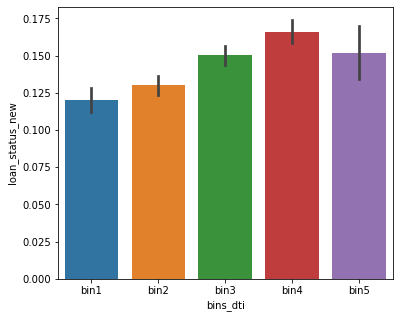

In [60]:
plt.figure(figsize=(6, 5))
sns.barplot(x="bins_dti",y="loan_status_new", data=loan_5)
plt.show()

higher dti, higher default rate. The last bin has small population, hence number is a bit skewed and hence ignoring it.

In [61]:
loan_5.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status_new
id,1.000000,0.993497,0.125203,0.135822,0.237490,0.058250,0.079642,0.107820,0.008949,0.091783,NaN,NaN,NaN,NaN,NaN,-0.010225,NaN,0.041580
member_id,0.993497,1.000000,0.125280,0.135138,0.247598,0.055243,0.074751,0.112406,0.010072,0.093152,NaN,NaN,NaN,NaN,NaN,-0.009929,NaN,0.038833
loan_amnt,0.125203,0.125280,1.000000,0.981603,0.936871,0.299237,0.931686,0.148267,0.266282,0.061402,NaN,NaN,NaN,NaN,NaN,-0.031758,NaN,0.062680
funded_amnt,0.135822,0.135138,0.981603,1.000000,0.955300,0.302955,0.957721,0.147930,0.261959,0.061251,NaN,NaN,NaN,NaN,NaN,-0.032708,NaN,0.059535
funded_amnt_inv,0.237490,0.247598,0.936871,0.955300,1.000000,0.295697,0.904110,0.158852,0.249320,0.070007,NaN,NaN,NaN,NaN,NaN,-0.037598,NaN,0.040097
int_rate,0.058250,0.055243,0.299237,0.302955,0.295697,1.000000,0.274791,-0.000602,0.046092,0.112188,NaN,NaN,NaN,NaN,NaN,0.082988,NaN,0.213497
installment,0.079642,0.074751,0.931686,0.957721,0.904110,0.274791,1.000000,0.121101,0.264684,0.050727,NaN,NaN,NaN,NaN,NaN,-0.029352,NaN,0.029868
emp_length,0.107820,0.112406,0.148267,0.147930,0.158852,-0.000602,0.121101,1.000000,0.111107,0.048619,NaN,NaN,NaN,NaN,NaN,0.063212,NaN,0.016656
annual_inc,0.008949,0.010072,0.266282,0.261959,0.249320,0.046092,0.264684,0.111107,1.000000,-0.123582,NaN,NaN,NaN,NaN,NaN,-0.012378,NaN,-0.038501
dti,0.091783,0.093152,0.061402,0.061251,0.070007,0.112188,0.050727,0.048619,-0.123582,1.000000,NaN,NaN,NaN,NaN,NaN,0.006733,NaN,0.042803


the variable loan_status_new has he highest correlation with int_rate which is approximately 21%. Hence one of the important variable for predicting default is int_rate.

##### Step2: Bivariate Data Analysis

Now,looking at the default behaviour in combination of two or more variable together

###### Plotting all the numeric variable to get the distribution of default status
###### to understand the distribution of default rate across different type of loans and loan terms, first thing to look at is what are the main loan types driving the market.
###### then for the main loan type, across loan term , we can observe the default rate. Similarly for main loan types, across loan amount disbursed bucket and income bucket default rate is observed.

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

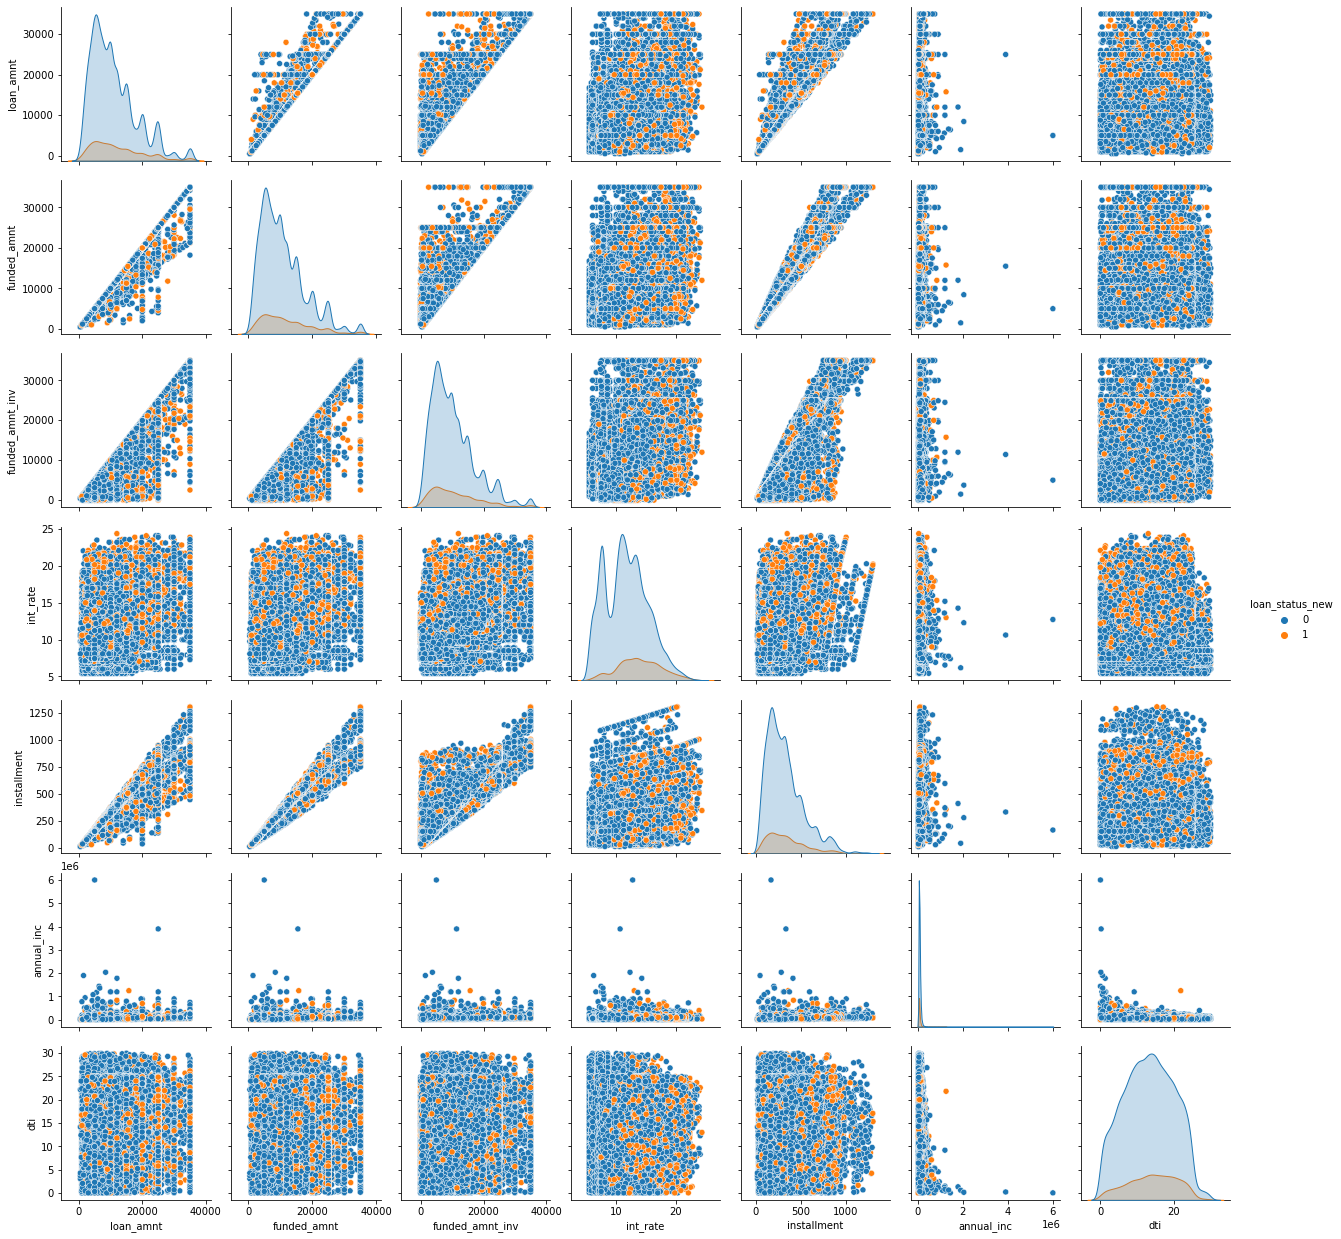

In [62]:
loan_6 = loan_5[["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment","annual_inc","dti","loan_status_new"]]
plt.figure(figsize = (16,5))
sns.pairplot(loan_6, hue='loan_status_new')
plt.show()

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='term', ylabel='loan_status_new'>

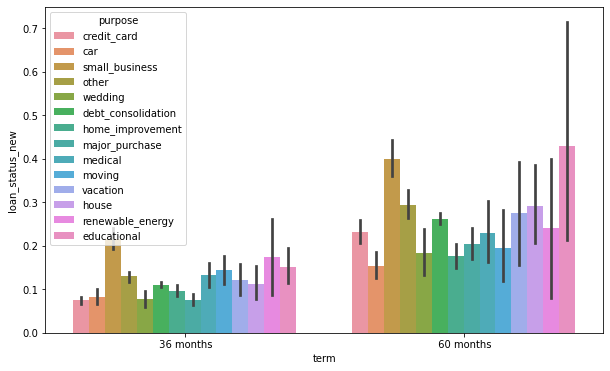

In [63]:
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status_new", hue='purpose', data=loan_5)
plt.show()

In [64]:
loan_5.purpose.value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

so from above chart and frequency, it is clear that top 5 main loan types are:
debt_consolidation    
credit_card            
home_improvement       
major_purchase         
small_business         

In [65]:
loan_7=loan_5[loan_5["purpose"].isin(["debt_consolidation","credit_card","home_improvement","major_purchase","small_business"])]
loan_7.shape
loan_7.purpose.value_counts()

(29149, 32)

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
small_business         1710
Name: purpose, dtype: int64

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='term', ylabel='loan_status_new'>

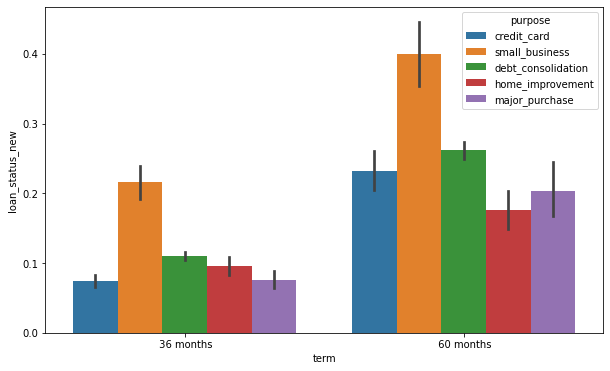

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='bins_dti', ylabel='loan_status_new'>

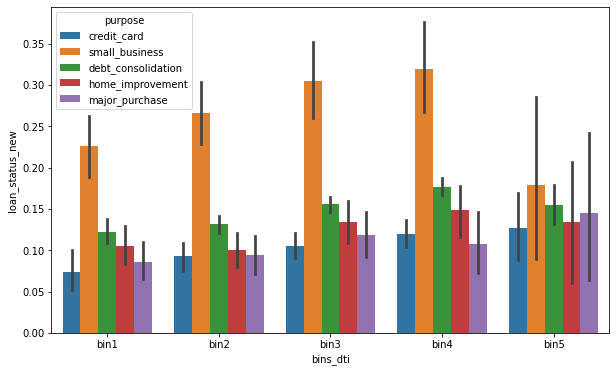

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='annual_income', ylabel='loan_status_new'>

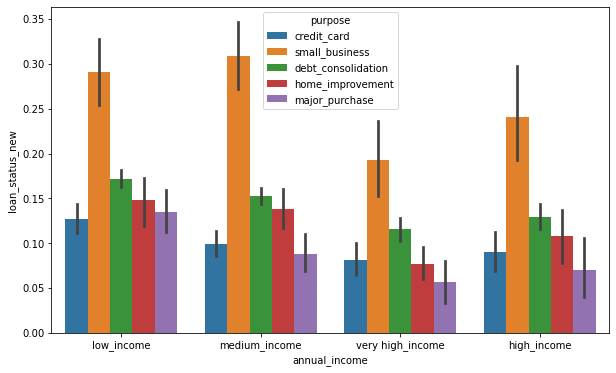

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='interest_rate', ylabel='loan_status_new'>

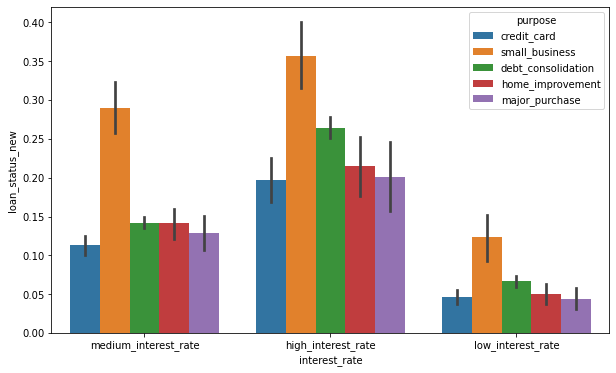

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='bins_loan_amnt', ylabel='loan_status_new'>

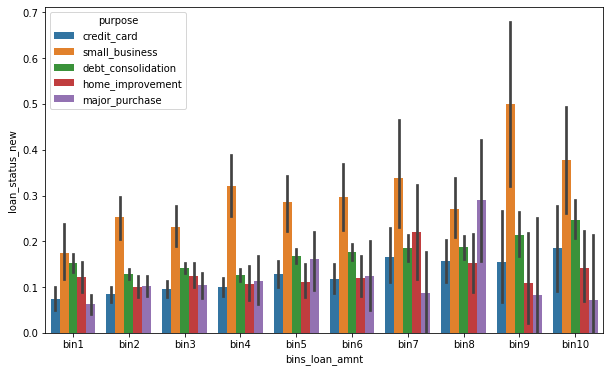

In [66]:
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status_new", hue='purpose', data=loan_7)
plt.show()

plt.figure(figsize=[10, 6])
sns.barplot(x='bins_dti', y="loan_status_new", hue='purpose', data=loan_7)
plt.show()

plt.figure(figsize=[10, 6])
sns.barplot(x='annual_income', y="loan_status_new", hue='purpose', data=loan_7)
plt.show()

plt.figure(figsize=[10, 6])
sns.barplot(x='interest_rate', y="loan_status_new", hue='purpose', data=loan_7)
plt.show()

plt.figure(figsize=[10, 6])
sns.barplot(x='bins_loan_amnt', y="loan_status_new", hue='purpose', data=loan_7)
plt.show()

After analysing, it is observed that small_business is the most riskiest profile and has the highest default rate